All the data is taken from insights.stackoverlow.com/survey

In [2]:
#import all the needed modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from chord import Chord
import itertools

In [3]:
results18 = pd.read_csv(r'C:\Users\timkh\OneDrive\Desktop\Programming\Dev surveys\2018\Results 2018.csv',usecols=[65],dtype=str)
results19 = pd.read_csv(r'C:\Users\timkh\OneDrive\Desktop\Programming\Dev surveys\2019\Results 2019.csv',usecols=[5,6,9,31,34,37,43,44,45,49,51,53,54,61,77,78,81,82])
display(results18.head())
display(results19.head())

,LanguageWorkedWith
0,JavaScript;Python;HTML;CSS
1,JavaScript;Python;Bash/Shell
2,NaN
3,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4,C;C++;Java;Matlab;R;SQL;Bash/Shell


,Employment,Country,UndergradMajor,ConvertedComp,WorkChallenge,ImpSyn,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,WebFrameWorkedWith,MiscTechWorkedWith,DevEnviron,OpSys,SocialMedia,Age,Gender,Ethnicity,Dependents
0,"Not employed, and not looking for work",United Kingdom,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,Django;Flask,Node.js,IntelliJ;Notepad++;PyCharm,Windows,Twitter,14.0,Man,NaN,No
1,"Not employed, but looking for work",Bosnia and Herzegovina,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,Django,NaN,Atom;PyCharm,Windows,Instagram,19.0,Man,NaN,No
2,Employed full-time,Thailand,Web development or web design,8820.0,Distracting work environment;Inadequate access...,Average,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,NaN,NaN,Vim;Visual Studio Code,Linux-based,Reddit,28.0,Man,NaN,Yes
3,Employed full-time,United States,"Computer science, computer engineering, or sof...",61000.0,NaN,A little below average,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,NaN,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,Reddit,22.0,Man,White or of European descent,No
4,Employed full-time,Ukraine,"Computer science, computer engineering, or sof...",NaN,Being tasked with non-development work;Inadequ...,A little above average,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Django;Express;Flask;jQuery;React.js;Spring,Cordova;Node.js,IntelliJ;Notepad++;Vim,Linux-based,Facebook,30.0,Man,White or of European descent;Multiracial,No


In [5]:
#a function to create a chord diagram of language co-occurrence
def lang_chord():
    #find the 18 most popular languages - only leave languages that are used by more than 5% of the respondents, remove "Other(s):"
    flatLang = pd.Series([item for sublist in results19.LanguageWorkedWith.astype(str).str.split(';') for item in sublist]).value_counts() #split the strings into lists and flatten them
    numRows = len(results19.index)
    langperc = (flatLang/numRows*100)
    languages = langperc[langperc>5].drop('Other(s):').index.tolist()
    
    #rename TypeScript to TS, Assembly to ASM, JavaScript to JS, Bash/Shell/PowerShell to Shell, so that their labels will look nice on the diagram
    languages[0] = 'JS'
    languages[5] = 'Shell'
    languages[9] = 'TS'
    languages[13] = 'ASM'

    
    #isolate the language column and convert the strings to lists, delete the rows that have ONLY NaN values
    one_col = results19['LanguageWorkedWith'].dropna(how='all').astype(str).str.split(';').to_frame()
    
    
    #rename the languages in one_col:
    def renamelangs(lis):
        new_lis = []
        for lang in lis:
            if lang == 'JavaScript':
                new_lis.append('JS')
            elif lang == 'TypeScript':
                new_lis.append('TS')
            elif lang  == 'Bash/Shell/PowerShell':
                new_lis.append('Shell')
            elif lang == 'Assembly':
                new_lis.append('ASM')
            else:
                new_lis.append(lang)
        return new_lis
    
    one_col = one_col.LanguageWorkedWith.apply(renamelangs).to_frame()
    
    
    #delete all the unpopuar languages from the column:
    one_col = one_col.LanguageWorkedWith.apply(lambda lis: [lang for lang in lis if lang in languages]).to_frame()
    
    
    #Find the biggest number of languages one of the respondents uses
    max_len = max(one_col.LanguageWorkedWith.apply(len))
    
    
    #split the one-column dataframe into a dataframe where each column cell has only 1 language, then replace None with NaN 
    langdf = pd.DataFrame(one_col['LanguageWorkedWith'].to_list(), columns=np.arange(max_len)).fillna(value=np.nan)
    
    
    #create a list with every type of combination in its original and reversed form.
    data = list(itertools.chain.from_iterable((i, i[::-1]) for i in langdf.values))
    #data is a list of arrays
    
    
    #remove NaN and then sort each array
    new_data = []
    i = 0
    for arr in data:
        if i % 2 == 0: #for even ones, just sort it
            new_arr = np.array(list(filter(lambda x: isinstance(x,str),arr))) #only leave strings - remove NaN
            new_data.append(sorted(new_arr))
            i += 1
        else: #for odd ones, sort and then reverse it
            new_arr = np.array(list(filter(lambda x: isinstance(x,str),arr)))
            new_data.append(sorted(new_arr)[::-1])
            i += 1
    data = new_data
                

    
    #create a pivot table
    matrix = pd.pivot_table(pd.DataFrame(data), index=0, columns=1, aggfunc="size", fill_value=0).values.tolist()
    
    
    #make sure stuff like "Python and Python occur together in 20 instances" doesn't happen
    for i in range(max_len):
        matrix[i][i] = 0

    
    #for whatever reason, 'a and b' and 'b and a' have 2 different values. 
    #The only way to change this is to replace them with the sum of both values (the true 'a and b' is the sum of wrong 'a and b' and wrong 'b and a' )
    for a in range(max_len):
        for b in range(max_len):
            matrix[a][b] = matrix[b][a] = matrix[a][b] + matrix[b][a]

    
    #names of the languages
    names = sorted(languages)
    
    
    Chord(matrix, names,wrap_labels = False,width=2000).show()
#lang_chord()

In [6]:
#find the percentage of respondents who use each language (I use the algortihm multiple times so I made a function for it)
def find_lang_perc(df):
    flatLang = pd.Series([item for sublist in df.LanguageWorkedWith.dropna().astype(str).str.split(';') for item in sublist]).value_counts()
    numRows = len(df.index)
    return (flatLang/numRows*100).round(1)
#find_lang_perc(results19)

In [7]:
#general statistics
def general():
    #total number of rows in the 2019 database
    numRows = len(results19.index)
    
    #employment
    print('Employment stats for 2019:')
    empl = results19['Employment'].value_counts(normalize=True) *100 #normalize gives the value counts relative to the total number o values - so 0.54 is 54%
    print((empl.round(1).astype(str)+'%').to_string()) #to_string to make it look nice (e.g. remove the dtype and name from the bottom)
    print()
    
    #gender
    print('Gender stats for 2019:')
    gend = results19['Gender'].value_counts(normalize=True) *100
    print((gend.round(1).astype(str)+'%').to_string())
    print()
    
    #ethnicity
    print('Ethnicity stats for 2019:')
    ethn = results19['Ethnicity'].value_counts(normalize=True) *100
    ethn = ethn[ethn>=0.5] #remove the ethnicities of which there are less than 0.5%
    print((ethn.round(1).astype(str)+'%').to_string())
    print()
    
    #countries
    print('Percentage of the respondents from different countries (excluding those less then 0.1%):')
    cou = results19['Country'].value_counts(normalize=True) *100
    cou = cou[cou >= 0.1]
    print((cou.round(1).astype(str)+'%').to_string())
    print()
    
    #salary
    print('Approximate global median annual salary in USD in 2019 is:')
    print(results19['ConvertedComp'].median())
    print()
    
    #competency
    print('Competency stats for 2019 (how good programmers think they are):')
    compet = results19['ImpSyn'].value_counts(normalize=True) *100
    #since these are ordinal categorical values, I have to manually enter their order in the index
    compet_ind = ['Far above average', 'A little above average', 'Average', 'A little below average', 'Far below average']
    print((compet.round(1).astype(str)+'%').reindex(compet_ind).to_string())
    print()
    
    #majors
    print('Ungdergrad majors of the respondents in 2019:')
    maj = ethn = results19['UndergradMajor'].value_counts(normalize=True) *100
    print((maj.round(1).astype(str)+'%').to_string())
    print()
    
    #challenges
    print('Challenges programmers faced in their workplace in 2019 (percentages will not add up to 100 because the survey allowed up to 3 choices):')
    #since each cell is a string with up to 3 challenges separated by ; we have to turn it into a list and then flatten each cell before counting the values
    flatCha = pd.Series([item for sublist in results19.WorkChallenge.astype(str).str.split(';') for item in sublist]).value_counts()
    #Alternative, but much slower way:
    #cha = results19['WorkChallenge']
    #flatCha = pd.Series(np.concatenate(cha.astype(str).str.split(';'))).value_counts()
    
    #normalize doesn't work because in flatCha there are more rows (each row is a separate challenge), 
    #so in order to get the correct percentages, 
    #we have to divide the value counts by the number of rows in the original unflattened dataset and multiply by 100
    print(((flatCha/numRows*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #languages
    print('Most popular languages by percentage of respondents who use them in 2019:')
    #find_lang_perc uses the same algorithm as the above flatCha, but it returns an ugly series, so it needs to be converted to a string
    print((find_lang_perc(results19).astype(str)+'%').to_string())
    print()
    
    #language desire next year
    print("Most popular languages by percentage of respondents who'd like to use them next year:")
    flatLangDes = pd.Series([item for sublist in results19.LanguageDesireNextYear.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatLangDes/numRows*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #databases
    print("Most popular databases by percentage of respondents who use them in 2019 (out of those who use databases in the first place):")
    flatDB = pd.Series([item for sublist in results19.DatabaseWorkedWith.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatDB/numRows*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #frameworks
    print("Most popular frameworks by percentage of respondents who use them in 2019 (out of those who use frameworks in the first place):")
    flatFramew = pd.Series([item for sublist in results19.WebFrameWorkedWith.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatFramew/numRows*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #misc. technology
    print("Most popular misc. technology by percentage of respondents who use them in 2019 (out of those who use misc. technology in the first place):")
    flatMisc = pd.Series([item for sublist in results19.MiscTechWorkedWith.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatMisc/numRows*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #IDEs
    print("Most popular developer environments by percentage of respondents who use them in 2019:")
    flatIDE = pd.Series([item for sublist in results19.DevEnviron.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatIDE/numRows*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #OSs
    print('Most popular OSs by percentage of resposndents who use them in 2019:')
    os = results19['OpSys'].value_counts(normalize=True) *100
    print((os.round(1).astype(str)+'%').to_string())
    print()
    
    #social media
    print('Most popular social media by percent of repspondents who indicated they used it the most in 2019:')
    media = results19['SocialMedia'].value_counts(normalize=True) *100
    media = media[media>=0.1]
    print((media.round(1).astype(str)+'%').to_string())
    print()
    
    #dependents
    print('Percentage of the respondents who have dependents (such as children or elderly) to care for:')
    dep = results19['Dependents'].value_counts(normalize=True) *100
    print((dep.round(1).astype(str)+'%').to_string())
    print()

    #chord diagram
    print('Interactive chord diagram of the languages that the respondents used together in 2019:')
    lang_chord()
    
    #age
    %matplotlib inline
    plt.suptitle('Histogram for age in 2019') #change the title of the histogram
    display(results19['Age'].hist())
    print()
    
    #language popularity over time
    #find the language stats from 2018, do data cleaning (make the names of the languages the same as in the 2019 dataset)
    stats18 = find_lang_perc(results18).rename('2018 % of respondents using the language').drop('CSS').rename(index={'HTML':'HTML/CSS','Bash/Shell':'Bash/Shell/PowerShell'})
    #add an "Others" column that would combine all the languages not in the 2019 dataset
    stats18['Others'] = stats18['Cobol']+stats18['CoffeeScript']+stats18['Delphi/Object Pascal']+stats18['Groovy']+stats18['Hack']+stats18['Haskell']+stats18['Julia']+stats18['Lua']+stats18['Matlab']+stats18['Ocaml']+stats18['Perl']+stats18['VB.NET']+stats18['Visual Basic 6']
    #too many languages look ugly on the bar chart, so combine those that are used by less than 3% of the respondents 
    #and add them to the "Others" column
    stats18['Others'] += stats18[stats18 <= 3].sum()
    
    stats19 = find_lang_perc(results19).rename(index={'Other(s):':'Others'})
    #combine all the languages not in the 2018 dataset in the "Others" column
    stats19['Others'] += stats19['Dart']+stats19['Elixir']+stats19['WebAssembly']+stats19['Rust']
    #again, combine all the unpopular laguages and add them to the "Others" column
    stats19['Others'] += stats19[stats19 <= 3].sum()
    
    #combine the 2 datasets
    statsTotal = stats18.to_frame().join(stats19.rename('2019 % of respondents using the language'))
    #now that their values are counted in the "Others" column, we canremove the unpopular languages
    display(statsTotal[statsTotal > 3].sort_values(by='2019 % of respondents using the language',ascending=True).dropna().plot.barh(title='Language popularity over time'))
    

#general()

In [8]:
#give country-specific data
def by_country(country):
    country = country.title()
    if country == 'Russia':
        country = 'Russian Federation'
    elif country == 'USA' or country == 'America' or country == 'US' or country == 'United States Of America':
        country = 'United States'
    
    #list of all countries in 2019
    countries = list(pd.Series(results19.Country.dropna().astype(str).unique()))
    if country not in countries: #if the country is not in the database
        raise ValueError

    #remove respondents from other countries
    sorted_df = results19[results19['Country'].astype(str).map(lambda cell: country in cell)]
    
    #median salary
    print(f'The median salary of those from {country} in 2019 was $',int(sorted_df['ConvertedComp'].median()),sep='')
    print()
    
    #gender
    print(f'Gender stats of {country} for 2019:')
    gend = sorted_df['Gender'].value_counts(normalize=True) *100
    print((gend.round(1).astype(str)+'%').to_string())
    print()
    
    #ethnicity
    print(f'Ethnicity stats of {country} for 2019:')
    ethn = sorted_df['Ethnicity'].value_counts(normalize=True) *100
    ethn = ethn[ethn>=0.5]
    print((ethn.round(1).astype(str)+'%').to_string())
    print()
                     
    #employment
    print(f'Employment statistics for those from {country}')
    empl = sorted_df['Employment'].value_counts(normalize=True) *100
    print((empl.round(1).astype(str)+'%').to_string())
    print()
    
    #social media
    print(f'Most popular social media by percent of respondents from {country} who indicated they used it the most in 2019:')
    media = sorted_df['SocialMedia'].value_counts(normalize=True) *100
    media = media[media>=0.1]
    print((media.round(1).astype(str)+'%').to_string())
    print()
    
    #dependents
    print(f'Percentage of the respondents from {country} who have dependents (such as children or elderly) to care for:')
    dep = sorted_df['Dependents'].value_counts(normalize=True) *100
    print((dep.round(1).astype(str)+'%').to_string())
    print()
    
    #languages
    print(f'Most popular languages by percentage of respondents who uses them in {country} in 2019:')
    flatLang = pd.Series([item for sublist in sorted_df.LanguageWorkedWith.astype(str).str.split(';') for item in sublist]).value_counts()
    try:
        print(((flatLang/len(sorted_df.index)*100).round(1).astype(str)+'%').drop('nan').to_string())
    except KeyError: #some countries do not have 'nan'
        print(((flatLang/len(sorted_df.index)*100).round(1).astype(str)+'%').to_string())
    print()
#by_country('Ukraine')

In [9]:
#language-specific data
def by_lang(lang):
    #avoid changing SQL to Sql
    if lang.islower():
        lang = lang.capitalize()
    
    #list of all languages in 2019
    langs = list(pd.Series([item for sublist in results19.LanguageWorkedWith.dropna().astype(str).str.split(';') for item in sublist]).unique())
    if lang not in langs: #if the language is not in the database
        raise ValueError
    
    #remove those respondents who do not work with the language
    sorted_df = results19[results19['LanguageWorkedWith'].astype(str).map(lambda cell: lang in cell)]
    
    #median salary
    print(f'The global median salary of those who used {lang} in 2019 was $',int(sorted_df['ConvertedComp'].median()),sep='')
    print()
    
    #want to keep using it
    sorted_df_nextyr = sorted_df[sorted_df['LanguageDesireNextYear'].astype(str).map(lambda cell: lang in cell)]
    perc_nextyr = len(sorted_df_nextyr.index)/len(sorted_df.index)*100
    print(f'Out of those who already use {lang}, {round(perc_nextyr,1)}% want to continue using it next year')
    print()
    
    #language co-occurrence
    print(f'Those who use {lang} also use these languages (percentages out of those who use {lang}):')
    flatLang = pd.Series([item for sublist in sorted_df.LanguageWorkedWith.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatLang/len(sorted_df.index)*100).round(1).astype(str)+'%').drop(lang).to_string())
    print()
    
    #misc. tech co-occurrence
    print(f'Those who use {lang} also use these technologies (percentages out of those who use {lang}):')
    flatMisc = pd.Series([item for sublist in sorted_df.MiscTechWorkedWith.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatMisc/len(sorted_df.index)*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #IDEs
    print(f'Those who use {lang} prefer these Development Environments:')
    flatIDE = pd.Series([item for sublist in sorted_df.DevEnviron.astype(str).str.split(';') for item in sublist]).value_counts()
    print(((flatIDE/len(sorted_df.index)*100).round(1).astype(str)+'%').drop('nan').to_string())
    print()
    
    #bar chart of popularity
    try:
        lang18 = find_lang_perc(results18)[lang]
        lang19 = find_lang_perc(results19)[lang]
        popul = pd.DataFrame([lang18,lang19],index=[2018,2019],columns=[f'% of respodents using {lang}'])
        display(popul.plot.bar(title = 'Language popularity'))
    except: #if the input language was not part of either the 2018 or the 2019 dataset
        pass
#by_lang('Python')

What do you want to group the data by? Enter 'g' for general insights, 'c' for insights by country, or 'l' for insights by language. g


Employment stats for 2019:
Employed full-time                                      73.9%
Independent contractor, freelancer, or self-employed     9.8%
Not employed, but looking for work                       6.4%
Employed part-time                                       5.1%
Not employed, and not looking for work                   4.4%
Retired                                                  0.4%

Gender stats for 2019:
Man                                                            91.2%
Woman                                                           7.4%
Non-binary, genderqueer, or gender non-conforming               0.7%
Man;Non-binary, genderqueer, or gender non-conforming           0.2%
Woman;Non-binary, genderqueer, or gender non-conforming         0.2%
Woman;Man                                                       0.2%
Woman;Man;Non-binary, genderqueer, or gender non-conforming     0.1%

Ethnicity stats for 2019:
White or of European descent                              66.4%
Sou

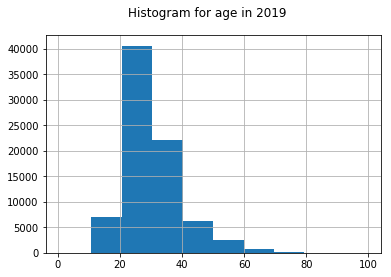

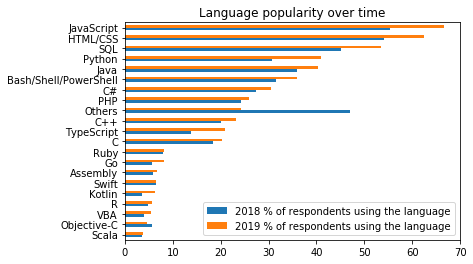

In [10]:
#The ultimate program
by = input("What do you want to group the data by? Enter 'g' for general insights, 'c' for insights by country, or 'l' for insights by language.")
if by == 'g':
    general()
elif by == 'c':
    country = input('What country would you like to see statistics for?')
    try:
        by_country(country)
    except ValueError:
        print('Sorry, that country is not in our database. Try checking the spelling.')
elif by == 'l':
    lang = input('What language would you like to see statistics for?')
    try:
        by_lang(lang)
    except ValueError:
        print("""Sorry, there was a problem accessing that language. Check the spelling or try another one. Some common mistakes:
                  - For HTML or CSS, enter 'HTML/CSS'. 
                  - For the Shell languages, enter 'Bash/Shell/PowerShell'
                  - Check the capitalization (Typescript should be TypeScript)
                  - If the language is an abbreviation (e.g. SQL), make sure you use all caps""")
else:
    print("Sorry, I didn't catch that :(")